In [47]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [48]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [49]:
print(tf.__version__)

2.18.0


In [50]:
train_dir = Path('../input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [51]:
test_dir = Path('../input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [52]:
val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [53]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [54]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [55]:
print('-Training set-\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-Training set-

Number of pictures: 2780

Number of different labels: 36

Labels: ['spinach' 'pomegranate' 'banana' 'soy beans' 'turnip' 'chilli pepper'
 'kiwi' 'capsicum' 'jalepeno' 'pineapple' 'cucumber' 'mango' 'sweetpotato'
 'tomato' 'lettuce' 'raddish' 'paprika' 'sweetcorn' 'lemon' 'potato'
 'peas' 'ginger' 'apple' 'corn' 'carrot' 'eggplant' 'garlic' 'pear'
 'onion' 'bell pepper' 'orange' 'grapes' 'beetroot' 'watermelon' 'cabbage'
 'cauliflower']


In [56]:
train_df.head(10)

,Filepath,Label
0,../input/fruit-and-vegetable-image-recognition...,spinach
1,../input/fruit-and-vegetable-image-recognition...,pomegranate
2,../input/fruit-and-vegetable-image-recognition...,banana
3,../input/fruit-and-vegetable-image-recognition...,soy beans
4,../input/fruit-and-vegetable-image-recognition...,turnip
5,../input/fruit-and-vegetable-image-recognition...,chilli pepper
6,../input/fruit-and-vegetable-image-recognition...,kiwi
7,../input/fruit-and-vegetable-image-recognition...,capsicum
8,../input/fruit-and-vegetable-image-recognition...,jalepeno
9,../input/fruit-and-vegetable-image-recognition...,spinach


# create a DataFrame with one Label of each category

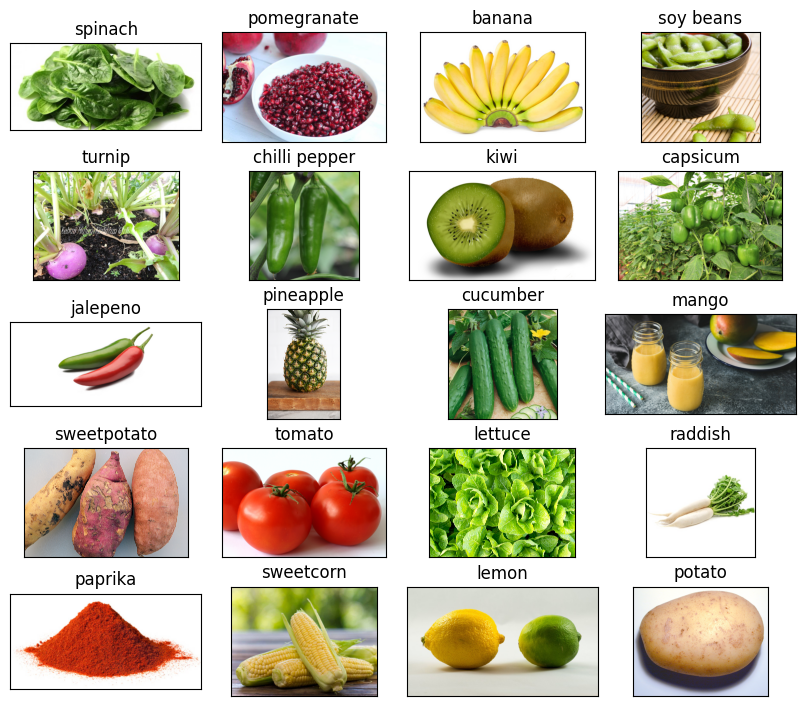

In [57]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [58]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [59]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [60]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [61]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [62]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [63]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 78s 818ms/step - accuracy: 0.3498 - loss: 2.5493 - val_accuracy: 0.8263 - val_loss: 0.5172
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 70s 809ms/step - accuracy: 0.8113 - loss: 0.6281 - val_accuracy: 0.8743 - val_loss: 0.3765
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 73s 836ms/step - accuracy: 0.8930 - loss: 0.3359 - val_accuracy: 0.9551 - val_loss: 0.2130
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 75s 854ms/step - accuracy: 0.9336 - loss: 0.2186 - val_accuracy: 0.9491 - val_loss: 0.1948
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 71s 826ms/step - accuracy: 0.9533 - loss: 0.1471 - val_accuracy: 0.9401 - val_loss: 0.2012


# predict the label of the test_images

In [64]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step 


['cucumber',
 'apple',
 'bell pepper',
 'banana',
 'turnip',
 'onion',
 'raddish',
 'watermelon',
 'pineapple',
 'pomegranate',
 'watermelon',
 'orange',
 'corn',
 'spinach',
 'garlic',
 'carrot',
 'lemon',
 'grapes',
 'potato',
 'pomegranate',
 'chilli pepper',
 'sweetpotato',
 'kiwi',
 'potato',
 'tomato',
 'jalepeno',
 'lettuce',
 'cucumber',
 'corn',
 'bell pepper',
 'lemon',
 'tomato',
 'beetroot',
 'cucumber',
 'corn',
 'lettuce',
 'cucumber',
 'paprika',
 'ginger',
 'cabbage',
 'carrot',
 'kiwi',
 'raddish',
 'chilli pepper',
 'bell pepper',
 'chilli pepper',
 'lemon',
 'turnip',
 'lemon',
 'onion',
 'lemon',
 'mango',
 'spinach',
 'orange',
 'beetroot',
 'lettuce',
 'paprika',
 'tomato',
 'pomegranate',
 'spinach',
 'ginger',
 'capsicum',
 'pear',
 'bell pepper',
 'watermelon',
 'carrot',
 'watermelon',
 'ginger',
 'tomato',
 'peas',
 'cauliflower',
 'peas',
 'corn',
 'cauliflower',
 'raddish',
 'pineapple',
 'spinach',
 'pomegranate',
 'mango',
 'raddish',
 'pineapple',
 'cabb

In [65]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [66]:
img = output('/kaggle/input/fruit-and-vegetable-image-recognition/test/garlic/Image_7.jpg')
print(f'predict fruit vegetable recognition is : {img}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predict fruit vegetable recognition is : garlic


In [67]:
model.save('MobileNet_CNN.h5')